# 机器学习实战笔记

* 该笔记是学习《机器学习实战》(第一版)一书所记
* 笔记中大多数代码来自[参考笔记](https://github.com/shazhongcheng/machine_learing_study/tree/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98%E4%B8%80)或书本以及[书本作者的GitHub](https://github.com/ageron/handson-ml)
* [学习参考视频](https://www.bilibili.com/video/BV1iE411y7BD)

# 什么是机器学习
书本原话是：机器学习是一门能够让编程计算机从数据中学习的计算机科学（和艺术）
- 例如垃圾邮件过滤器就是一个机器学习程序，它通过垃圾邮件与常规邮件的示例，来学习这么标记垃圾邮件

# 为什么要学习机器学习
通过机器学习算法可以简化那些现有解决方案需要大量手动调整或者规则列表超长的问题的代码，并且提升执行表现

# 机器学习的种类
- 是否在人的监督下训练（监督式学习/无监督式学习/半监督式学习/强化学习）
- 是否可以动态增量学习（在线学习/批量学习）
- 简单的将新数据与已知数据进行匹配还是对训练数据进行模式检测，然后创建一个预测模型（基于实例学习/基于模型学习）

![jupyter](./图片/如何选择合适的算法(中文).png)

## 书中案例 
根据人均GDP预测人民生活满意度 （基于模型的学习）

In [2]:
import matplotlib     #导包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
np.random.seed(42)

In [3]:
from sklearn.linear_model import LinearRegression   #线性回归算法
from sklearn.neighbors import KNeighborsRegressor    #K-临近算法

In [4]:
# 加载数据(数据在同路径下datas文件夹)
oecd_bli = pd.read_csv("./datas/oecd_bli_2015.csv",thousands=",")
gdp_per_capita = pd.read_csv("./datas/gdp_per_capita.csv",thousands=","
                            ,delimiter='\t',encoding='latin1',na_values='n/a')

In [5]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [6]:
gdp_per_capita.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0


In [19]:
#数据预处理 （来自参考笔记）
def prepare_country_stats(oecd_bli,gdp_per_capita):
    oecd_bli=oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli=oecd_bli.pivot(index="Country",columns="Indicator",values="Value")
#     print(oecd_bli.dtypes)
    gdp_per_capita.rename(columns={"2015":"GDP per capita"},inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
#     print(gdp_per_capita.dtypes)
    full_country_stats=pd.merge(left=oecd_bli,right=gdp_per_capita,left_index=True,
                               right_index=True)
    full_country_stats.sort_values(by="GDP per capita",inplace=True)
#     print(full_country_stats.dtypes)
    remove_indices=[0,1,6,8,33,34,35]
    keep_indices=list(set(range(36))-set(remove_indices))
    return full_country_stats[["GDP per capita","Life satisfaction"]].iloc[keep_indices]

In [20]:
#预处理后的数据
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [9]:
# 训练数据
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)
x=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

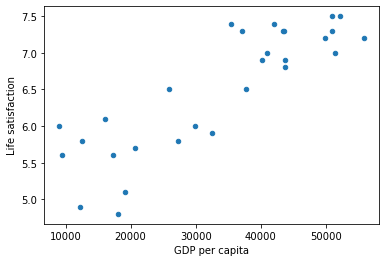

In [10]:
# 数据可视化
country_stats.plot(kind='scatter',x="GDP per capita",y="Life satisfaction")
plt.show()

In [11]:
# 定义线性模型，并训练和测试
lin_reg_model=LinearRegression()   #实例化线性回归算法
lin_reg_model.fit(x,y)   #带入训练
x_new=[[22587]]    #测试
print(lin_reg_model.predict(x_new))

[[5.96242338]]


要将前面代码的回归线性模型替换成KNN，只需将代码LinearRegression()替换成KNeighborsRegressor(n_neighbors=3)
- n_neighbors=3  取临近3个点

In [12]:
# 定义k近邻模型，并训练和测试
clf=KNeighborsRegressor(n_neighbors=3)   #实例化K-近邻算法
clf.fit(x,y)    #带入训练
x_new=[[22587]]   #测试
print(clf.predict(x_new))

[[5.76666667]]


如果一切顺利，你的模型可能会作出很好的预测，如果不行，可能需要使用更多的属性，或者更多更高质量的数据，再或者换一个更强大的模型

# 机器学习主要的挑战

## 训练数据量的不足
机器不像人，目前大部分机器学习需要大量的数据才能正常工作（除非重用现有模型的某些部分）
#### 数据的不合理有效性
2001年，微软有研究员表明，截然不同的机器学习算法（包括最简单的算法）在自然语言歧义消除这个复杂问题的表现上，几乎完全一致
这些结果表明，和算法开发上，数据的建设也尤为重要
## 训练数据不具代表性
就如之前的根据人均GDP预测人民生活满意度任务为例，如果有部分数据缺失，则会是模型的预测不准确

In [13]:
# 样例：根据人均GDP预测人民生活满意度  （来自参考笔记）
# 线性模型
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
%matplotlib inline
np.random.seed(42)

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

oecd_bli = pd.read_csv("./datas/oecd_bli_2015.csv",thousands=",")
gdp_per_capita = pd.read_csv("./datas/gdp_per_capita.csv",thousands=","
                            ,delimiter='\t',encoding='latin1',na_values='n/a')

full_country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [14]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [15]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

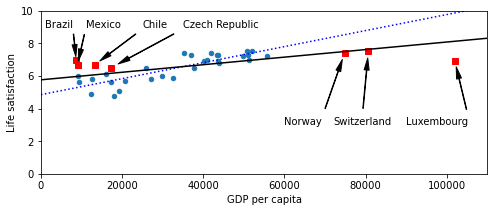

In [16]:

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# 缺数数据的预测
lin1 = LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

# 全部数据的预测
lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.show()

- 图中演示部分数据丢失导致模型的差异

#### 采样偏差
采样偏差是使训练数据不具代表性的重要原因，一个著名的案例是1936年，兰登对决罗斯福
其次，还有一种特殊类型的采用偏差，叫做无反应偏差
## 质量差的数据
如果训练数据满是错误、异常值和噪声，系统将更难检测到底层模式，更不太可能会表现良好 ，所以很有必要花时间处理训练数据
- 如果某些实例明显是异常情况，要么直接丢弃，要么手动修复错误
- 如果某些实例缺少部分特征，要么整体忽略这些特征，你必须决定整体忽略这些特征，还是忽略这这部分有缺失的实例，又或者是将这些缺省值补充完整，或者训练 一个带有这个特征的模型，再训练一个不带有这个特征的模型等等

## 无关特征
正所谓：垃圾入，垃圾出。只有训练数据里面包含足够多的相关特征，和较少的无关特征， 系统才能够完成学习。一个成功的机器学习项目，关键部分是提取出一组好的用来训练的特征集，这个过程叫做特征工程，包括以下几点：
- 特征选择：选择最有用的特征进行训练
- 特征提取：将现有特征进行整合，产生更有用的特征(比如降维)
- 通过收集数据创造新特征

## 训练数据的过度拟合
书中有一个举例：加入你出国旅游，被当地的出租车司机宰了一刀，你可能会觉得当地出租车司机都是强盗，机器也会这样过度概况这一事情，在机器学习中这被称为'过拟合'，这种情况可能在训练数据上表现良好，但泛化时常常不尽如人意。

F:\Program Files (x86)\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
F:\Program Files (x86)\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


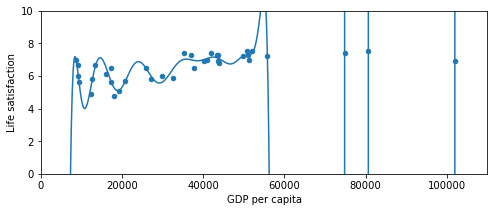

In [17]:
# 代码来自参考笔记
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.show()

⚠模型在训练数据上表现良好，但你真的敢相信它吗？

#### 解决方案：
- 简化模型（例如：选择线性模型，而不是高阶多项式）
- 收集更多训练数据
- 减少训练数据中的噪声（例如：修复数据错误和消除异常值）
- 通过约束模型使其更加简单，降低过拟合的风险-----正则化，也就是将原来模型的自由度进行额外的限制，这个正则化参数不是模型训练优化出来的，而是人手动给定的，故又称为超参数

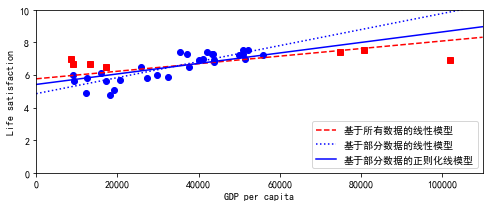

In [18]:
# 代码来自参考笔记
plt.figure(figsize=(8,3))
plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.rcParams['font.sans-serif'] = ['SimHei']  #更改一个有中文的字体
plt.rcParams['axes.unicode_minus']=False  #解决符号不显示问题

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="基于所有数据的线性模型")
plt.plot(X, t0 + t1*X, "b:", label="基于部分数据的线性模型")
# 岭回归 也就是 l2正则，在最后的损失计算时 + w^2
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="基于部分数据的正则化线模型")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

## 训练数据的拟合不足
与过拟合相反，产生的原因是对于训练数据来说，模型太过于加单，比如用线性模型预测幸福度，就属于拟合不足，因为实际情况显然比这要复杂的多。
#### 解决方式：
- 选择更多参数，更强大的模型
- 给学习算法提供更好的特征集(特征工程)
- 减少模型中的约束(比如，减少正则化超参数)

## 退后一步
### 总结一下：

- 机器学习是关于如何让机器更好地处理某些特定任务的理论，它从数据中学习，而不是将规则进行清晰的编码。
- 机器学习有很多类型：监督式和无监督式，批量的和在线的，基于实例的和基于模型的，等等
- 在一个机器学习项目中，你从训练集中采集数据，然后将数据交给学习算法来计算，如果算法是基于模型的，它会调整一些参数来将模型适配于训练集(即对训练集本身做出很好的预测)，然后算法就可以对新的场景做出合理的预测。如果算法是基于实例的，它会记住这些样例，然后根据相似度来对新的实例进行泛化。
- 如果训练集的数据太少，训练代表性不够，包含太多噪声或者是被一些无关特征污染(垃圾进，垃圾出)，那么系统将无法很好的工作。最后，你的模型既不能太简单（这会导致拟合不足），也不能太复杂(这会导致过度拟合)。

还有一个最后要讲的重要主题是：在训练好了一个模型之后，你不能只是“希望”它可以正确地对新的场景做出泛化。你还需要评估它，必要时做出一些调整。下面就来看看如何做到这一点

## 测试和验证
了解一个模型对于新场景的泛化能力的唯一办法就是，让模型真实的去处理新场景
- 更好的选择是将数据分割成两部分：训练集和测试集。顾名思义，训练集用来训练模型，测试集用来测试模型，应对新场景的误差率称为泛化误差。通过测试集来评估模型，就可以得到对这个误差的评估。这个评估可以知道模型在处理新场景的能力如何。
- 如果训练误差很低(模型对于训练集很少出错),但是泛化误差很高，那说明模型对于训练数据存在过度拟合。
- 通常采用20%的数据用于测试，80%的数据用于训练

### 交叉验证
西瓜书上是这么解释：交叉验证法先将数据集D划分为k个大小相似的互斥子集，每个子集Di都尽可能保持数据分布的一致性，即从D中通过分层采样得到。然后每次用k-1个子集的并集做为训练集，余下的子集做为测试集，这样就可以获得K组训练/测试集，从而可以进行k次训练和测试，最终返回的是这个k个测试结果的均值。k通常的取值是10，其他常用取值为2，5，20等。

- 交叉验证可以“充分利用”有限的数据找到合适的模型参数，防止过度拟合。（一般用于数据集较小时）
- 原先是将数据分成K分，选取K-1分进行训练，会出现K中情况
- 而交叉验证则是将那N种情况都训练一次，所以训练时间预计要比之前长K倍
- K的取值范围为2~样本数(一份一个样本)

![jupyter](./图片/交叉验证原理图.jpg)

## 没有免费的午餐的定理
书中原文：
- 模型是观察的简化，这个简化是丢弃了哪些数据不大可能泛化至新实例上的多余细节。但是要决定对丢弃哪些数据以及保留哪些数据，必须要做出假设。
比如，线性模型基于的假设就是，数据基本上都是线性的，而实例与直线之间的距离都是噪声，可以安全的忽略它们。
- 1996年，David Wolpert提到，如果没有对数据做出假设，就么没有理由更偏好于哪个模型，那么想要知道哪个模型最好的方式，就是对所有模型进行评估，但实际是不可能的，所以需要对数据做出一些合理的假设。比如，对于简单任务，只会评估几个具有不同正则化水平的线性模型，而对于复杂的问题，则会评估多个神经网络模型。
##### 西瓜书上的解释，可以参考：https://zhuanlan.zhihu.com/p/145188127